#                                 Beginner EDA Project: Understanding Patient Admission Patterns

## 1) Import Liraries & Load Data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('HDHI Admission data.csv')

In [5]:
df.head(5)

,SNO,MRD No.,D.O.A,D.O.D,AGE,GENDER,RURAL,TYPE OF ADMISSION-EMERGENCY/OPD,month year,DURATION OF STAY,...,CONGENITAL,UTI,NEURO CARDIOGENIC SYNCOPE,ORTHOSTATIC,INFECTIVE ENDOCARDITIS,DVT,CARDIOGENIC SHOCK,SHOCK,PULMONARY EMBOLISM,CHEST INFECTION
0,1,234735,4/1/2017,4/3/2017,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,4/1/2017,4/5/2017,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,4/1/2017,4/3/2017,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,4/1/2017,4/8/2017,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,4/1/2017,4/23/2017,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


## 2) Data Cleaning, Feature Engineering & Type Conversion

In [7]:
df_copy = df.copy()   # make copy of original data

In [8]:
df_copy.columns = df_copy.columns.str.strip().str.replace(' ', '_').str.upper()  
df_copy.columns

Index(['SNO', 'MRD_NO.', 'D.O.A', 'D.O.D', 'AGE', 'GENDER', 'RURAL',
       'TYPE_OF_ADMISSION-EMERGENCY/OPD', 'MONTH_YEAR', 'DURATION_OF_STAY',
       'DURATION_OF_INTENSIVE_UNIT_STAY', 'OUTCOME', 'SMOKING', 'ALCOHOL',
       'DM', 'HTN', 'CAD', 'PRIOR_CMP', 'CKD', 'HB', 'TLC', 'PLATELETS',
       'GLUCOSE', 'UREA', 'CREATININE', 'BNP', 'RAISED_CARDIAC_ENZYMES', 'EF',
       'SEVERE_ANAEMIA', 'ANAEMIA', 'STABLE_ANGINA', 'ACS', 'STEMI',
       'ATYPICAL_CHEST_PAIN', 'HEART_FAILURE', 'HFREF', 'HFNEF', 'VALVULAR',
       'CHB', 'SSS', 'AKI', 'CVA_INFRACT', 'CVA_BLEED', 'AF', 'VT', 'PSVT',
       'CONGENITAL', 'UTI', 'NEURO_CARDIOGENIC_SYNCOPE', 'ORTHOSTATIC',
       'INFECTIVE_ENDOCARDITIS', 'DVT', 'CARDIOGENIC_SHOCK', 'SHOCK',
       'PULMONARY_EMBOLISM', 'CHEST_INFECTION'],
      dtype='object')

In [9]:
df_copy['D.O.A'] = pd.to_datetime(df_copy['D.O.A'], errors='coerce')
df_copy['D.O.D'] = pd.to_datetime(df_copy['D.O.D'], errors='coerce')

In [10]:
df_copy.rename(columns={'TYPE_OF_ADMISSION-EMERGENCY/OPD': 'ADMISSION_TYPE'}, inplace=True)

In [11]:
df_copy.rename(columns={'MRD_NO.': 'PATIENTID'}, inplace=True)
df_copy.head()

,SNO,PATIENTID,D.O.A,D.O.D,AGE,GENDER,RURAL,ADMISSION_TYPE,MONTH_YEAR,DURATION_OF_STAY,...,CONGENITAL,UTI,NEURO_CARDIOGENIC_SYNCOPE,ORTHOSTATIC,INFECTIVE_ENDOCARDITIS,DVT,CARDIOGENIC_SHOCK,SHOCK,PULMONARY_EMBOLISM,CHEST_INFECTION
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,0,0
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,0,0
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,0,0
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_copy['PREVIOUS_VISITS'] = df_copy.groupby('PATIENTID').cumcount()

In [13]:
df_copy['PREVIOUS_VISITS'].value_counts()

PREVIOUS_VISITS
0     12244
1      2598
2       566
3       190
4        72
5        31
6        18
7        12
8         8
9         4
10        4
11        2
12        2
13        2
14        2
15        1
16        1
Name: count, dtype: int64

In [14]:
try:
    def assign_department(row):
        if row['CHEST_INFECTION'] == 1:
            return 'Pulmonology'
        elif row['UTI'] == 1:
            return 'Urology'
        elif row['DVT'] == 1 or row['PULMONARY_EMBOLISM'] == 1:
            return 'Vascular'
        elif row['CARDIOGENIC_SHOCK'] == 1 or row['SHOCK'] == 1:
            return 'Critical Care'
        elif row['NEURO_CARDIOGENIC_SYNCOPE'] == 1 or row['ORTHOSTATIC'] == 1:
            return 'Neurology'
        elif row['INFECTIVE_ENDOCARDITIS'] == 1:
            return 'Cardiology'
        else:
            return 'General Medicine'
    
    df_copy['DEPARTMENT'] = df_copy.apply(assign_department, axis=1)

except Exception as e:
    print("Error:", e)

In [15]:
try:
    def assign_room_type(row):
        if str(row['OUTCOME']).strip().lower() == 'death' or row['SHOCK'] == 1 or row['CARDIOGENIC_SHOCK'] == 1:
            return 'Private'
        elif row['DURATION_OF_STAY'] >= 7:
            return 'Private'
        elif row['ADMISSION_TYPE'] == 'Emergency' and 3 <= row['DURATION_OF_STAY'] < 7:
            return 'Semi-Private'
        elif row['DURATION_OF_STAY'] <= 2:
            return 'General'
        else:
            return 'Semi-Private'

    df_copy['ROOM_TYPE'] = df_copy.apply(assign_room_type, axis=1)

except Exception as e:
    print("Error:", e)

In [16]:
df_copy.head()

,SNO,PATIENTID,D.O.A,D.O.D,AGE,GENDER,RURAL,ADMISSION_TYPE,MONTH_YEAR,DURATION_OF_STAY,...,ORTHOSTATIC,INFECTIVE_ENDOCARDITIS,DVT,CARDIOGENIC_SHOCK,SHOCK,PULMONARY_EMBOLISM,CHEST_INFECTION,PREVIOUS_VISITS,DEPARTMENT,ROOM_TYPE
0,1,234735,2017-04-01,2017-04-03,81,M,R,E,Apr-17,3,...,0,0,0,0,0,0,0,0,General Medicine,Semi-Private
1,2,234696,2017-04-01,2017-04-05,65,M,R,E,Apr-17,5,...,0,0,0,0,0,0,0,0,General Medicine,Semi-Private
2,3,234882,2017-04-01,2017-04-03,53,M,U,E,Apr-17,3,...,0,0,0,0,0,0,0,0,General Medicine,Semi-Private
3,4,234635,2017-04-01,2017-04-08,67,F,U,E,Apr-17,8,...,0,0,0,0,0,0,0,0,General Medicine,Private
4,5,234486,2017-04-01,2017-04-23,60,F,U,E,Apr-17,23,...,0,0,0,0,0,0,0,0,General Medicine,Private


In [17]:
df_copy['ADMISSION_DAY'] = df_copy['D.O.A'].dt.day_name()

In [18]:
# Clean and convert data types
df_copy['PATIENTID'] = df_copy['PATIENTID'].astype(str)
df_copy['GENDER'] = df_copy['GENDER'].astype('category')
df_copy['ADMISSION_TYPE'] = df_copy['ADMISSION_TYPE'].astype('category')
df_copy['DEPARTMENT'] = df_copy['DEPARTMENT'].astype('category')
df_copy['ROOM_TYPE'] = df_copy['ROOM_TYPE'].astype('category')
df_copy['ADMISSION_DAY'] = df_copy['ADMISSION_DAY'].astype('category')

In [19]:
# Drop rows with missing PATIENTID 
df_copy = df_copy.dropna(subset=['PATIENTID'])

# Fill numeric columns with median
df_copy['AGE'] = df_copy['AGE'].fillna(df_copy['AGE'].median())
df_copy['PREVIOUS_VISITS'] = df_copy['PREVIOUS_VISITS'].fillna(df_copy['PREVIOUS_VISITS'].median())

# Fill categorical columns with mode (most frequent value)
categorical_cols = ['GENDER', 'ADMISSION_TYPE', 'DEPARTMENT', 'ROOM_TYPE', 'ADMISSION_DAY']
for col in categorical_cols:
    df_copy[col] = df_copy[col].fillna(df_copy[col].mode()[0])


In [20]:
# Select only the required columns
selected_columns = [
    'PATIENTID', 'AGE', 'GENDER', 'ADMISSION_TYPE',
    'DEPARTMENT', 'ROOM_TYPE', 'PREVIOUS_VISITS', 'ADMISSION_DAY'
]
df_cleaned = df_copy[selected_columns].copy()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv('cleaned_dataset.csv', index=False)

print("Cleaned dataset saved as 'cleaned_dataset.csv'")


Cleaned dataset saved as 'cleaned_dataset.csv'


## 3) Understand Basic Structure of Cleaned Data

In [22]:
df_cleaned.shape

(15757, 8)

In [23]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15757 entries, 0 to 15756
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PATIENTID        15757 non-null  object  
 1   AGE              15757 non-null  int64   
 2   GENDER           15757 non-null  category
 3   ADMISSION_TYPE   15757 non-null  category
 4   DEPARTMENT       15757 non-null  category
 5   ROOM_TYPE        15757 non-null  category
 6   PREVIOUS_VISITS  15757 non-null  int64   
 7   ADMISSION_DAY    15757 non-null  category
dtypes: category(5), int64(2), object(1)
memory usage: 447.3+ KB


In [24]:
df_cleaned.describe()

,AGE,PREVIOUS_VISITS
count,15757.000000,15757.000000
mean,61.426160,0.330393
std,13.420862,0.835247
min,4.000000,0.000000
25%,54.000000,0.000000
50%,62.000000,0.000000
75%,70.000000,0.000000
max,110.000000,16.000000


In [25]:
df_cleaned.isnull().sum()
df_cleaned.duplicated().sum()

0

## 4) Exploratory Data Analysis Questions

In [27]:
#1. What is the total number of admissions?
total_admissions = df_cleaned.shape[0]
print(f"Total Number of Admissions: {total_admissions}")

Total Number of Admissions: 15757


GENDER
M    9990
F    5767
Name: count, dtype: int64


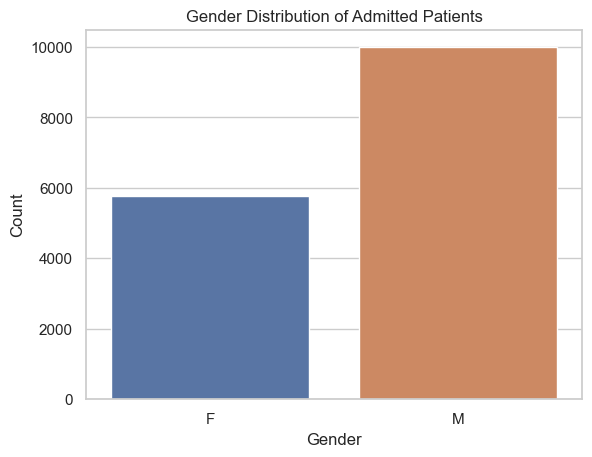

In [28]:
#2. What is the distribution of gender among admitted patients?
print(df_cleaned['GENDER'].value_counts())
sns.set(style='whitegrid')
sns.countplot(data=df_cleaned, x='GENDER', palette='deep', hue='GENDER' )
plt.title('Gender Distribution of Admitted Patients')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

AGE_GROUP
51-65    6779
66+      5980
36-50    2353
19-35     570
0-18       73
Name: count, dtype: int64


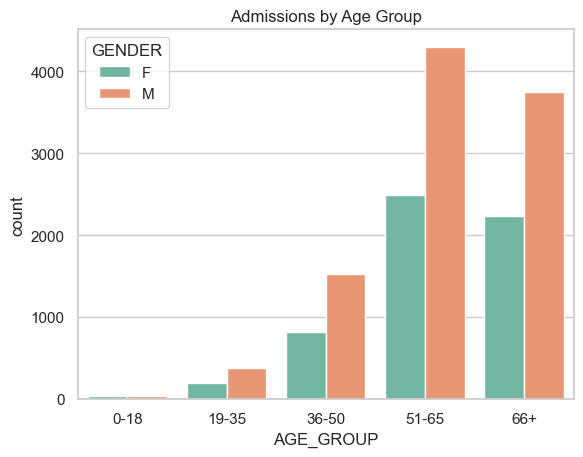

In [29]:
#3. Which age group is most frequently admitted?
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66+']
df_cleaned['AGE_GROUP'] = pd.cut(df_cleaned['AGE'], bins=bins, labels=labels)
print(df_cleaned['AGE_GROUP'].value_counts())
sns.countplot(x='AGE_GROUP', data=df_cleaned, order=labels, palette='Set2', hue='GENDER')
plt.title("Admissions by Age Group")
plt.show()

ADMISSION_TYPE
E    10924
O     4833
Name: count, dtype: int64


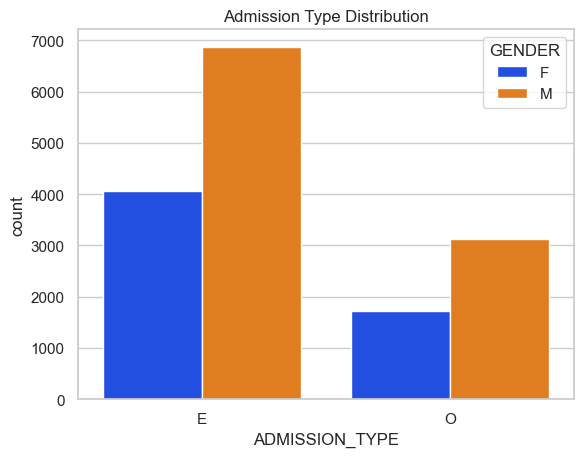

In [30]:
#4. What are the most common admission types?
print(df_cleaned['ADMISSION_TYPE'].value_counts())
sns.countplot(x='ADMISSION_TYPE', data=df_cleaned , palette='bright', hue='GENDER')
plt.title("Admission Type Distribution")
plt.show()

DEPARTMENT
General Medicine    13130
Critical Care        1065
Urology               975
Vascular              346
Neurology             214
Cardiology             27
Name: count, dtype: int64


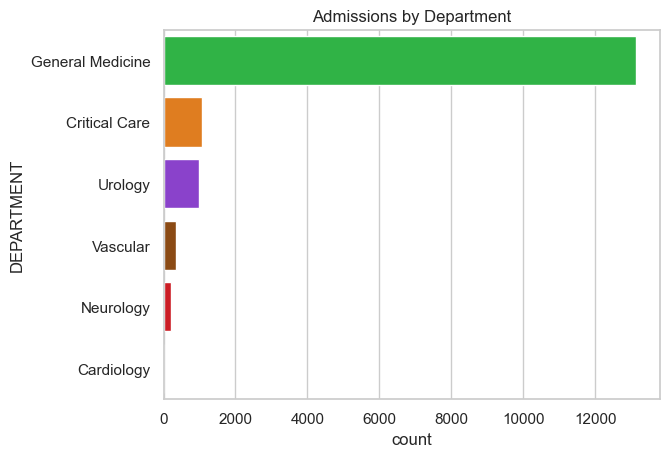

In [31]:
#5. Which departments have the highest number of admissions?
print(df_cleaned['DEPARTMENT'].value_counts())
sns.countplot(y='DEPARTMENT', data=df_cleaned, order=df_cleaned['DEPARTMENT'].value_counts().index , palette='bright', hue='DEPARTMENT', legend=False)
plt.title("Admissions by Department")
plt.show()


ROOM_TYPE
Semi-Private    6848
Private         6556
General         2353
Name: count, dtype: int64


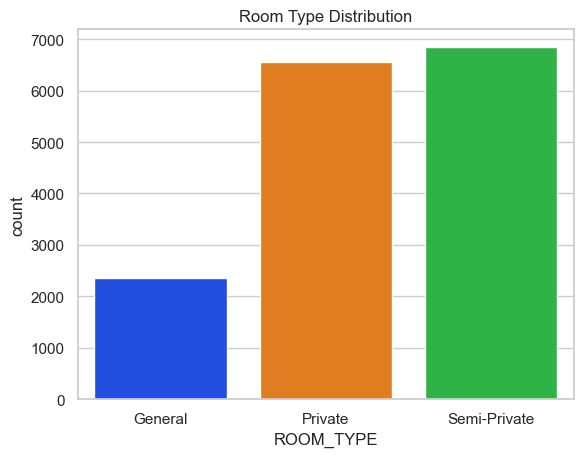

In [32]:
#6. What room type is most frequently assigned?
print(df_cleaned['ROOM_TYPE'].value_counts())
sns.countplot(x='ROOM_TYPE', data=df_cleaned , palette='bright', hue='ROOM_TYPE', legend=False)
plt.title("Room Type Distribution")
plt.show()


ADMISSION_DAY
Monday       7269
Tuesday      1556
Thursday     1441
Friday       1439
Saturday     1393
Wednesday    1373
Sunday       1286
Name: count, dtype: int64


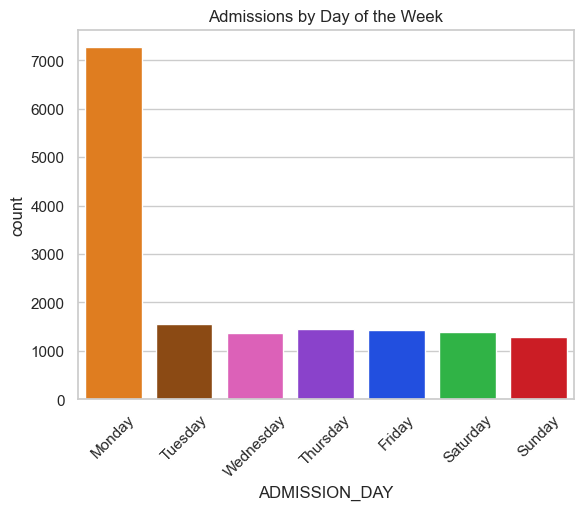

In [33]:
#7. On which day of the week do most patients get admitted?
print(df_cleaned['ADMISSION_DAY'].value_counts())
sns.countplot(x='ADMISSION_DAY', data=df_cleaned, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='bright', hue='ADMISSION_DAY', legend=False)
plt.title("Admissions by Day of the Week")
plt.xticks(rotation=45)
plt.show()

In [34]:
#8. What percentage of patients have visited before (previous_visits > 0)?
visited_before = df_cleaned[df_cleaned['PREVIOUS_VISITS'] > 0].shape[0]
percentage = (visited_before / df_cleaned.shape[0]) * 100
print(f"Percentage of patients with previous visits: {percentage:.2f}%")


Percentage of patients with previous visits: 22.29%


ADMISSION_TYPE  GENDER
E               F         4055
                M         6869
O               F         1712
                M         3121
dtype: int64


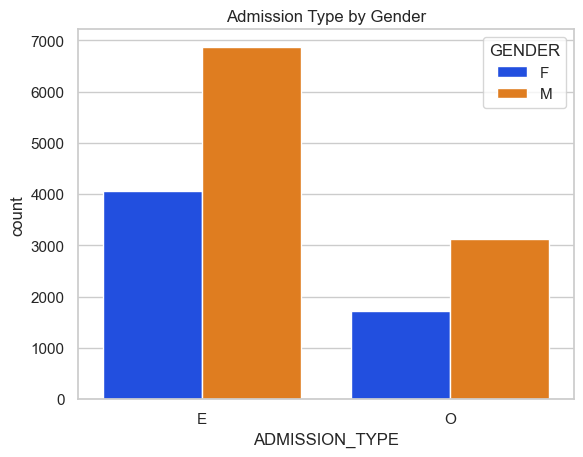

In [35]:
#9. Is there a difference in admission types across genders?
print(df_cleaned.groupby(['ADMISSION_TYPE', 'GENDER'], observed=True).size())
sns.countplot(x='ADMISSION_TYPE', data=df_cleaned, palette='bright', hue='GENDER')
plt.title("Admission Type by Gender")
plt.show()

In [36]:
#10. Create 3 visualizations to represent interesting patterns in the data.

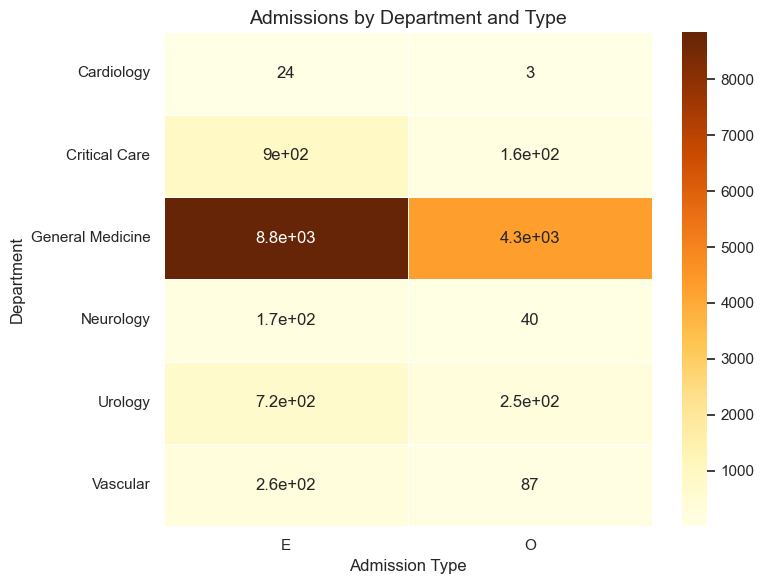

In [37]:
#  a) Heatmap: Admission Type vs. Department

plt.figure(figsize=(8, 6))
heatmap_data = df_cleaned.pivot_table(
    index='DEPARTMENT',
    columns='ADMISSION_TYPE',
    aggfunc='size',
    fill_value=0,
    observed=False
)
sns.heatmap(heatmap_data, annot=True, cmap='YlOrBr', linewidths=0.5)
plt.title("Admissions by Department and Type", fontsize=14)
plt.xlabel("Admission Type")
plt.ylabel("Department")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

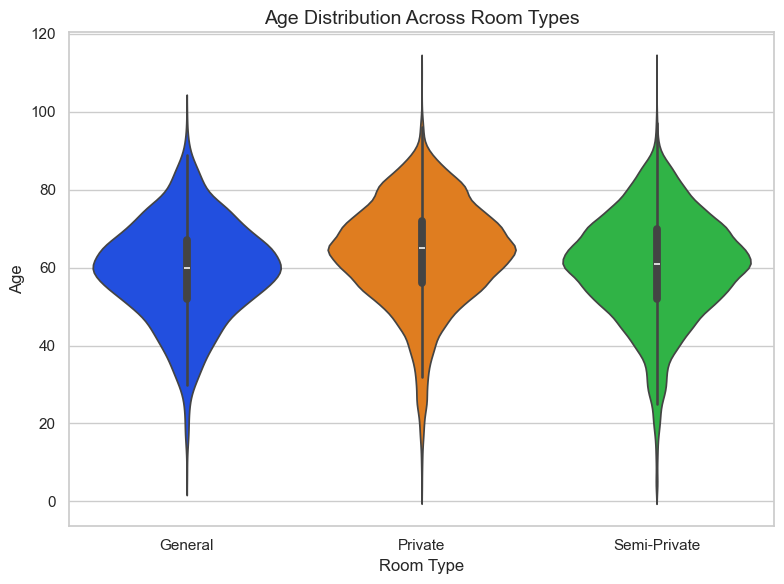

In [38]:
#  b) Violin Plot: Age Distribution by Room Type

plt.figure(figsize=(8, 6))
sns.violinplot(x='ROOM_TYPE', y='AGE', data=df_cleaned, hue='ROOM_TYPE', palette='bright', legend=False)
plt.title("Age Distribution Across Room Types", fontsize=14)
plt.xlabel("Room Type")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

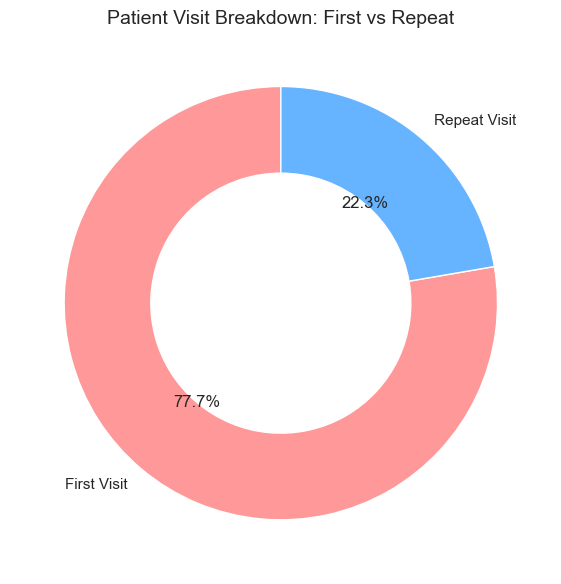

In [39]:
# c) Donut Chart – Previous Visits

df_cleaned['VISIT_TYPE'] = df_cleaned['PREVIOUS_VISITS'].apply(lambda x: 'First Visit' if x == 0 else 'Repeat Visit')
visit_counts = df_cleaned['VISIT_TYPE'].value_counts()
colors = ['#ff9999','#66b3ff']
plt.figure(figsize=(6,6))
plt.pie(visit_counts, labels=visit_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=dict(width=0.4))
plt.title("Patient Visit Breakdown: First vs Repeat", fontsize=14)
plt.tight_layout()
plt.show()